In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import csv
def loadobj(filename):
    # there just process two elements f and v
    vertices = []
    faces = []
    for line in open(filename):
        if line.startswith('#'):continue
        values = line.split()
        if values[0] == 'v':
            v = [float(x) for x in values[1:4]]
            v = [v[0], v[2], v[1]]
            vertices.append(v)
        elif values[0] == 'f':
            f = [int(values[1]), int(values[3]), int(values[2])]
            faces.append(f)
    return vertices, faces

def loadValueAndVector(path):
    
    eigen_value = []
    eigen_vector = []
    file = open(path, 'r')
    rows = csv.reader(file)
    for i in rows:
        if len(i) == 3:
            eigen_value.append(np.array(i, dtype=np.float))
        elif len(i) == 9:
            eigen_vector.append(np.array(i, dtype=np.float).reshape(3,3))        
        else:
            continue
    return eigen_value, eigen_vector

In [4]:
ref_curvature_path = 'E:\\zy_QA\\SVR-mesh-v3\\data\\noiserockerArm-Noise001\\eigen_1_vv.csv'
ref_mesh_path = 'E:\\zy_QA\\LIRIS_EPFL_GenPurpose\\RockerArm_models\\rockerArm-Noise001.obj'

ref_vertices, ref_faces = loadobj(ref_mesh_path)
eigen_value, eigen_vectors = loadValueAndVector(ref_curvature_path)
eigen_value_mean = [np.mean(i) for i in eigen_value]
eigen_value_max = [max(i) for i in eigen_value]
sorted_eigen_value_mean = sorted(eigen_value_mean)

In [6]:
each_dice = (sorted_eigen_value_mean[-1] - sorted_eigen_value_mean[0])/1000
rate_dis = [int((eigen_value_mean[i] - sorted_eigen_value_mean[0])/each_dice) for i in range(len(eigen_value_mean))]


In [7]:
rate_dis[:10]

[59, 84, 67, 163, 79, 73, 80, 48, 98, 83]

In [8]:
import  pandas as pd 

In [10]:
df = pd.DataFrame(rate_dis)

,0
count,40177.000000
mean,115.540135
std,61.844756
min,0.000000
25%,73.000000
50%,102.000000
75%,143.000000
max,1000.000000


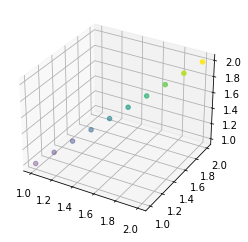

In [15]:
X = np.linspace(1,2,10)
figure = plt.figure()
axes = figure.add_subplot(111, projection='3d')
axes.scatter3D(X,X,X, c=np.linspace(100, 200, 10))

In [16]:
rate_dis_v2 = [i/10+100 for i in rate_dis]

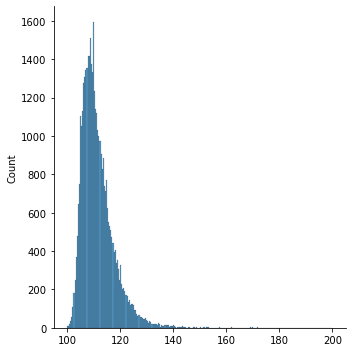

In [18]:
sns.displot(rate_dis_v2)

In [19]:
np.histogram(rate_dis_v2)

(array([19183, 17466,  2973,   433,    78,    21,    11,     5,     5,
            2], dtype=int64),
 array([100., 110., 120., 130., 140., 150., 160., 170., 180., 190., 200.]))